So the goal of this assignment is to 1. group users as adopted and non-adopted. 2. Identify the features that determine future adoptions.

In [85]:
# import pandas
import pandas as pd
import datetime as dt

eng_df = pd.read_csv('takehome_user_engagement.csv', header = 0, encoding='latin-1')
user_df = pd.read_csv('takehome_users.csv', header = 0, encoding = 'latin-1')

In [86]:
eng_df.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [87]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [88]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [89]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [90]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [91]:
#Checking for Null Values
user_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [92]:
eng_df.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

Reminder: Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user adoption. 

- This will have to likely start in the user dataframe and then include the engagement dataframe in order to find the seven day periods

With this in mind, the users that have a missing last_session_created_time must never have logged in but have a created an account. I am assuming that these users could not have been adopted. This could provide useful information as to what factors lead to adoption. 


In [93]:
"""For now we need to provide a way to easily determine null values
for 'last_session_creation_time'
and for 'invited_by_user_id' 
So I believe that creating null columns with boolean values is best"""

user_df['last_session_is_null'] = user_df['last_session_creation_time'].isnull()
user_df['invited_by_is_null'] = user_df['invited_by_user_id'].isnull()


In [94]:
user_df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'last_session_is_null', 'invited_by_is_null'],
      dtype='object')

In [95]:
user_df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'last_session_is_null', 'invited_by_is_null'],
      dtype='object')

In [96]:
user_df.head() #good looks all set here

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_is_null,invited_by_is_null
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,False


In [97]:
"""Now it is probably best to fill the null values in.
It looks like last session creation time is not a date_time value, so I should
be okay sticking a zero here. As well as sticking a zero into the invited_by because
these people do not seem to have been allocated to any invite. 
My only concern is that putting a zero into the last_session_created will 
cause some imbalances. But if that is the case I can return back to this cell
and edit
"""
user_df['last_session_creation_time'] = user_df['last_session_creation_time'].fillna(value = 0)
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].fillna(value = 0)

In [98]:
user_df.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
last_session_is_null          0
invited_by_is_null            0
dtype: int64

In [99]:
"""Now that the null values are taken care of in the user dataframe, it is time
to continue to search for errors. A way to do this is taking the value_counts of all columns
to ensure there is nothing strange going on."""

for column in user_df.columns:
    print(column)
    print(user_df[column].value_counts())

object_id
2047     1
7473     1
9534     1
3387     1
1338     1
        ..
10904    1
4759     1
6806     1
661      1
2049     1
Name: object_id, Length: 12000, dtype: int64
creation_time
2012-09-14 21:35:03    2
2012-09-01 07:22:09    2
2013-05-25 04:35:52    2
2014-02-11 17:57:53    2
2012-08-26 23:53:06    1
                      ..
2014-02-28 02:13:40    1
2012-12-21 05:51:02    1
2013-12-06 16:53:27    1
2012-08-10 01:52:57    1
2013-08-20 14:47:07    1
Name: creation_time, Length: 11996, dtype: int64
name
Cavalcanti Victor    5
Araujo Gabriela      5
Carvalho Bruna       4
Souza Fernanda       4
Correia Leonardo     4
                    ..
Mathiasen Line       1
Silva Kauan          1
Davis Sarah          1
Blake Sophia         1
Martins Matheus      1
Name: name, Length: 11355, dtype: int64
email
KlausMueller@gustr.com               2
AmandaABach@gmail.com                2
ThomasBrandt@gmail.com               2
MagnusSWinther@jourrapide.com        2
MarkoSeiler@yahoo.com     

As an aside, it looks like there some emails show up multiple times. Lets dig into this a bit more as maybe we can unveil something

In [100]:
duplicate_emails_bool = user_df['email'].value_counts() > 1

In [101]:
duplicate_emails_bool.sum() #This works because True is also considered 1

20

This number is so negligble that it seems unimportant to dig any further

While I am tempted to move onto the engagement dataframe to start finding out adoptions. At some point we will need to create a model to predict these adoptions, which means getting features, which means breaking down the dates into days and months, etc.. So while we are currently working with the user dataframe, It is probably best to make sure that the date and time is set up correctly for later.

In [102]:
user_df['creation_time'].head() #Well, since it is an object, I suppose we most convert it.

0    2014-04-22 03:53:30
1    2013-11-15 03:45:04
2    2013-03-19 23:14:52
3    2013-05-21 08:09:28
4    2013-01-17 10:14:20
Name: creation_time, dtype: object

In [103]:
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])
user_df['creation_time'].head()

0   2014-04-22 03:53:30
1   2013-11-15 03:45:04
2   2013-03-19 23:14:52
3   2013-05-21 08:09:28
4   2013-01-17 10:14:20
Name: creation_time, dtype: datetime64[ns]

In [104]:
#Now to split up the creation time
user_df['creation_time_year'] = user_df['creation_time'].dt.year
user_df['creation_time_month'] = user_df['creation_time'].dt.month
user_df['creation_time_day'] = user_df['creation_time'].dt.day
user_df['creation_time_hour'] = user_df['creation_time'].dt.hour
user_df['creation_time_minute'] = user_df['creation_time'].dt.minute
user_df['creation_time_second'] = user_df['creation_time'].dt.second

"""I know I'll end up cutting this down later to just a few of these columns
but for now I will leave them so I have something to think about"""

"I know I'll end up cutting this down later to just a few of these columns\nbut for now I will leave them so I have something to think about"

So we can move on from here, and with the creation of the creation_time splits, we can now remove creation time, as the model will not accept datetimes (as far as I have learned) I'll create a new dataframe copy that drops the datetime column.

In [105]:
df = user_df.copy().drop(columns = ['creation_time'])
df.head() # looks good

,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_is_null,invited_by_is_null,creation_time_year,creation_time_month,creation_time_day,creation_time_hour,creation_time_minute,creation_time_second
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,False,2014,4,22,3,53,30
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False,False,2013,11,15,3,45,4
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,False,2013,3,19,23,14,52
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,False,2013,5,21,8,9,28
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,False,2013,1,17,10,14,20


At this time it would be best to go ahead and standardize the features of our dataframe. From here we can begin to work out the model and then figure out how we would best incorporate the engagement dataframe to figure out our adopted users.
Looking at the dataframe, there are multiple things that would serve no purpose, like name and email, but let's leave them for now

In [106]:
#Giving Dummies to Creation Source
df = pd.get_dummies(df, columns =['creation_source'])
#I believe that I'll have to get rid of the True/False values, but I don't know which model I'll be using, so I'll do it once I decide


In [107]:
df.head()

,object_id,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_is_null,invited_by_is_null,...,creation_time_month,creation_time_day,creation_time_hour,creation_time_minute,creation_time_second,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,False,False,...,4,22,3,53,30,1,0,0,0,0
1,2,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,False,False,...,11,15,3,45,4,0,1,0,0,0
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,False,False,...,3,19,23,14,52,0,1,0,0,0
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,False,False,...,5,21,8,9,28,1,0,0,0,0
4,5,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,False,False,...,1,17,10,14,20,1,0,0,0,0


In [108]:
#now that we have semi-prepared the user_dataframe (df), let's move onto the engagement dataframe
eng_df.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [109]:
for column in eng_df.columns:
    print(column)
    print(eng_df[column].value_counts())

time_stamp
2014-05-04 17:13:38    2
2013-12-17 03:09:54    2
2014-03-29 03:09:54    2
2014-05-02 03:09:54    2
2014-02-26 03:09:54    2
                      ..
2013-12-28 20:39:37    1
2013-04-28 03:07:30    1
2013-10-08 02:00:04    1
2014-04-02 04:39:10    1
2014-04-16 22:34:54    1
Name: time_stamp, Length: 207220, dtype: int64
user_id
3623     606
906      600
1811     593
7590     590
8068     585
        ... 
6763       1
3773       1
5822       1
10040      1
2047       1
Name: user_id, Length: 8823, dtype: int64
visited
1    207917
Name: visited, dtype: int64


In [110]:
#Now for the part that has given me so many headaches. 7 day rolling ranges
eng_df['time_stamp_dt'] = pd.to_datetime(eng_df['time_stamp'])
eng_df['time_stamp_ymd'] = eng_df['time_stamp_dt'].dt.to_period('D')

In [111]:
eng_df.time_stamp_ymd.head(0)

Series([], Name: time_stamp_ymd, dtype: period[D])

In [112]:
date_list_day1 = list(pd.date_range(start='2012-05-31', end='2014-06-07', freq='7D'))
date_list_day7 = list(pd.date_range(start='2012-06-06', end='2014-06-14', freq='7D'))


In [113]:

adopted = []
for day1, day7 in zip(date_list_day1, date_list_day7):
    week = eng_df[(eng_df.time_stamp_dt >= day1) & (eng_df.time_stamp_dt < day7)]
    week_logins = week.groupby(pd.Grouper(key='user_id')).count()
    week_logins_adopted = week_logins[week_logins.visited >2]
    adopted.extend(week_logins_adopted.index.values)

In [114]:
adopted[0:10] #It Works!

[728, 1693, 5297, 69, 69, 197, 2078, 7529, 7590, 9312]

In [115]:
adopted_list_for_df = []
for user in df.index.values:
    adopted_list_for_df.append(user in adopted)

df['is_adopted'] = adopted_list_for_df
df['is_adopted'].value_counts()

False    10637
True      1363
Name: is_adopted, dtype: int64

In [116]:
#time to drop the email and name, and object_id columns
df = df.drop(columns = ['name','email','object_id'])
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_is_null,invited_by_is_null,creation_time_year,creation_time_month,creation_time_day,creation_time_hour,creation_time_minute,creation_time_second,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,is_adopted
0,1.398139e+09,1,0,11,10803.0,False,False,2014,4,22,3,53,30,1,0,0,0,0,False
1,1.396238e+09,0,0,1,316.0,False,False,2013,11,15,3,45,4,0,1,0,0,0,False
2,1.363735e+09,0,0,94,1525.0,False,False,2013,3,19,23,14,52,0,1,0,0,0,False
3,1.369210e+09,0,0,1,5151.0,False,False,2013,5,21,8,9,28,1,0,0,0,0,False
4,1.358850e+09,0,0,193,5240.0,False,False,2013,1,17,10,14,20,1,0,0,0,0,False


In [147]:
#for fun let's go ahead and create bar graphs for all of the columns in relation to their adoption
import matplotlib.pyplot as plt
import seaborn as sns

#Wanted to create a function that created bar graphs for each section. Instead I'm going to do each one individually. For what I think is important.

In [148]:
#Let's just see what the overall percentage is first
x = 10637 + 1363
print("Not Adopted: " +str(10637/x))
print("Adopted: " +str(1363/x))

Not Adopted: 0.8864166666666666
Adopted: 0.11358333333333333


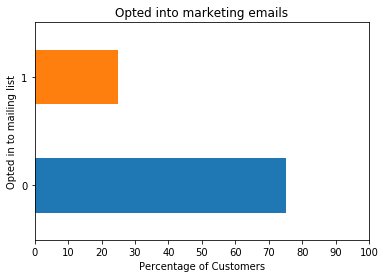

In [151]:
deci100 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
palette = sns.color_palette()
mailin = round(df['opted_in_to_mailing_list'].value_counts(normalize=True), 4)*100
mailin.plot(kind='barh', title='Opted into marketing emails', xlim=(0, 100), 
                    xticks = deci100, color=palette)
plt.xlabel('Percentage of Customers')
plt.ylabel('Opted in to mailing list')
plt.show()


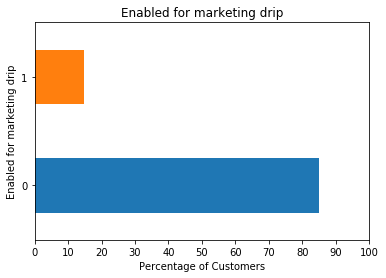

In [152]:
marketingdrip = round(df['enabled_for_marketing_drip'].value_counts(normalize=True), 3)*100

marketingdrip.plot(kind='barh', title='Enabled for marketing drip', xlim=(0, 100), 
                    xticks = deci100, color=palette)
plt.xlabel('Percentage of Customers')
plt.ylabel('Enabled for marketing drip')
plt.show()

In [157]:
#I'm going to skip over the time of creation fields, I don't think they will provide useful information
#creation source though is more interesting to me
guestinvite = round(df['creation_source_GUEST_INVITE'].value_counts(normalize=True), 3)
guestinvite

0    0.82
1    0.18
Name: creation_source_GUEST_INVITE, dtype: float64

In [158]:
orginvite = round(df['creation_source_ORG_INVITE'].value_counts(normalize=True), 3)
orginvite

0    0.646
1    0.354
Name: creation_source_ORG_INVITE, dtype: float64

In [159]:
signup = round(df['creation_source_SIGNUP'].value_counts(normalize=True), 3)
signup

0    0.826
1    0.174
Name: creation_source_SIGNUP, dtype: float64

In [161]:
personalprojects = round(df['creation_source_PERSONAL_PROJECTS'].value_counts(normalize = True), 3)
personalprojects

0    0.824
1    0.176
Name: creation_source_PERSONAL_PROJECTS, dtype: float64

In [162]:
signup_google = round(df['creation_source_SIGNUP_GOOGLE_AUTH'].value_counts(normalize=True), 3)
signup_google

0    0.885
1    0.115
Name: creation_source_SIGNUP_GOOGLE_AUTH, dtype: float64

In [167]:
#So, this was interesting, but I suppose I should be looking for correlations
import numpy as np

for column in df.columns:
    corr_matrix = np.corrcoef(df[column], df['is_adopted'])
    print(str(column) + " " + str(corr_matrix[0,1]))

last_session_creation_time -0.01490701367928983
opted_in_to_mailing_list -0.0012554152342156395
enabled_for_marketing_drip 0.013601435062045975
org_id 0.009663082636405166
invited_by_user_id -0.0036476933890260367
last_session_is_null 0.01496826919057044
invited_by_is_null 0.0009815853244777232
creation_time_year 0.0036610649035833474
creation_time_month -0.00022136149869242733
creation_time_day 0.006034918115327351
creation_time_hour -0.003159565814703095
creation_time_minute -0.0041499317357717395
creation_time_second -0.025904869647094098
creation_source_GUEST_INVITE 0.011832955310382658
creation_source_ORG_INVITE -0.01053207870367646
creation_source_PERSONAL_PROJECTS -0.018468152457263413
creation_source_SIGNUP 0.007588166874181004
creation_source_SIGNUP_GOOGLE_AUTH 0.014537678980317824
is_adopted 1.0


My human eye cannot see much here to indicate strong relationships between columns and their adoption level. I believe that the type of data that is being collected isn't as useful to figuring out if customers are to be adopted or not, but more so like how much money the spend in the platform, and what their main use of the platform is. But we will go on to create the machine learning algorithm to see if it is able to pick up something that I am missing.

In [172]:
y = df['is_adopted']
X = df.drop(columns = ['is_adopted'])

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 44)

In [175]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.001, max_iter = 5000).fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      3191
        True       0.00      0.00      0.00       409

    accuracy                           0.89      3600
   macro avg       0.44      0.50      0.47      3600
weighted avg       0.79      0.89      0.83      3600



C:\Users\elyse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Okay, so as it stands, the model is not picking up any of the True adopted users. I do not think parameters will help in this regard, the best option is by trying to give the model a scaled form of the data.

In [179]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [180]:
scaled_df = pd.DataFrame(minmaxscaler.transform(df), columns = df.columns, index = df.index)
scaled_df.head(10)

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_is_null,invited_by_is_null,creation_time_year,creation_time_month,creation_time_day,creation_time_hour,creation_time_minute,creation_time_second,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,is_adopted
0,0.997198,1.0,0.0,0.026442,0.900325,0.0,0.0,1.0,0.272727,0.700000,0.130435,0.898305,0.508475,1.0,0.0,0.0,0.0,0.0,0.0
1,0.995842,0.0,0.0,0.002404,0.026336,0.0,0.0,0.5,0.909091,0.466667,0.130435,0.762712,0.067797,0.0,1.0,0.0,0.0,0.0,0.0
2,0.972660,0.0,0.0,0.225962,0.127094,0.0,0.0,0.5,0.181818,0.600000,1.000000,0.237288,0.881356,0.0,1.0,0.0,0.0,0.0,0.0
3,0.976566,0.0,0.0,0.002404,0.429286,0.0,0.0,0.5,0.363636,0.666667,0.347826,0.152542,0.474576,1.0,0.0,0.0,0.0,0.0,0.0
4,0.969176,0.0,0.0,0.463942,0.436703,0.0,0.0,0.5,0.000000,0.533333,0.434783,0.237288,0.338983,1.0,0.0,0.0,0.0,0.0,0.0
5,0.989556,0.0,0.0,0.473558,0.936828,0.0,0.0,0.5,1.000000,0.533333,0.130435,0.627119,0.101695,1.0,0.0,0.0,0.0,0.0,0.0
6,0.967151,0.0,1.0,0.088942,0.000000,0.0,1.0,0.0,1.000000,0.500000,0.565217,0.406780,0.542373,0.0,0.0,0.0,1.0,0.0,0.0
7,0.000000,1.0,1.0,0.177885,0.000000,1.0,1.0,0.5,0.545455,1.000000,0.217391,0.576271,0.033898,0.0,0.0,1.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.725962,0.000000,1.0,1.0,0.5,0.909091,0.133333,0.173913,0.067797,0.406780,0.0,0.0,1.0,0.0,0.0,0.0
9,0.999833,1.0,1.0,0.764423,0.345279,0.0,0.0,0.5,0.000000,0.500000,0.956522,0.135593,0.050847,0.0,1.0,0.0,0.0,0.0,0.0


In [181]:
y = scaled_df['is_adopted']
X = scaled_df.drop(columns = ['is_adopted'])

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify =y, random_state=44)

In [185]:
#this time I'm going to upsample the data as well
newX = pd.concat([X_train, y_train], axis = 1)
not_adopted = newX[newX.is_adopted == 0]
is_adopted = newX[newX.is_adopted == 1]

In [190]:
from sklearn.utils import resample

upsampled_adopted = resample(is_adopted, replace = True, n_samples = len(not_adopted), random_state = 44)

In [191]:
upsampled_whole = pd.concat([not_adopted, upsampled_adopted])
upsampled_whole.is_adopted.value_counts() # So that seems to have worked

1.0    7446
0.0    7446
Name: is_adopted, dtype: int64

In [192]:
newy_train = upsampled_whole.is_adopted
newX_train = upsampled_whole.drop(columns = ['is_adopted'])

In [193]:
lr_upsampled = LogisticRegression(C = 0.001, max_iter = 15000, tol = 0.001).fit(newX_train, newy_train)

In [194]:
upsampled_predict = lr_upsampled.predict(X_test)
upsampled_predict[0:100] #seems better

array([0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.])

In [195]:
print(classification_report(y_test, upsampled_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.51      0.65      3191
         1.0       0.12      0.50      0.19       409

    accuracy                           0.51      3600
   macro avg       0.50      0.51      0.42      3600
weighted avg       0.80      0.51      0.60      3600



In [196]:
#maybe a higher C will help
lr_upsampled2 = LogisticRegression(C = 0.1, max_iter = 15000, tol = 0.001).fit(newX_train, newy_train)

In [197]:
print(classification_report(y_test, lr_upsampled2.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.53      0.66      3191
         1.0       0.12      0.50      0.19       409

    accuracy                           0.52      3600
   macro avg       0.50      0.51      0.43      3600
weighted avg       0.80      0.52      0.61      3600

